Build the Linear regression model for:

a) winequality_red:

In [368]:
import statsmodels.api as sm
import numpy as np
from sklearn import datasets, linear_model
import pandas as pa
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [369]:
df_red = pa.read_csv(r"C:\Users\krent\OneDrive\Desktop\winequality-red.csv", delimiter=";")

In [370]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


1. Calculate all the coeficients

In [371]:
x = df_red[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y = df_red["quality"]

In [372]:
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
results.params

const                  28.750677
fixed acidity           0.051927
volatile acidity       -1.199746
citric acid            -0.357268
residual sugar          0.013892
chlorides              -1.610924
free sulfur dioxide    -0.002087
density               -25.516181
pH                     -0.247224
sulphates               0.899400
alcohol                 0.286096
dtype: float64

In [373]:
results.pvalues

const                  1.766012e-01
fixed acidity          4.103082e-02
volatile acidity       3.264173e-23
citric acid            1.243217e-02
residual sugar         3.571522e-01
chlorides              1.192226e-04
free sulfur dioxide    2.020651e-01
density                2.397175e-01
pH                     1.912438e-01
sulphates              9.292435e-15
alcohol                3.503190e-26
dtype: float64

In [374]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     86.44
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          3.63e-142
Time:                        15:36:00   Log-Likelihood:                -1579.2
No. Observations:                1599   AIC:                             3180.
Df Residuals:                    1588   BIC:                             3240.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  28.7507     21.267      1.352      0.177     -12.964      70.465
fixed acidity           0.0519      0.025      2.045      0.041       0.002       0.102
volatile acidity       -1.1997      0.119    -10.082      0.000      -1.433      -0.966
citric acid            -0.3573      0.143     -2.502      0.012      -0.637      -0.077
residual sugar          0.0139      0.015      0.921      0.357      -0.016       0.043
chlorides              -1.6109      0.418     -3.857      0.000      -2.430      -0.792
free sulfur dioxide    -0.0021      0.002     -1.276      0.202      -0.005       0.001
density               -25.5162     21.695     -1.176      0.240     -68.070      17.038
pH                     -0.2472      0.189     -1.307      0.191      -0.618       0.124
sulphates               0.8994      0.115      7.824      0.000       0.674       1.125
alcohol                 0.2861      0.027     10.776      0.000       0.234       0.338
==============================================================================
Omnibus:                       24.508   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.999
Skew:                          -0.144   Prob(JB):                     9.24e-09
Kurtosis:                       3.687   Cond. No.                     4.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. Calculate p-values. 
   If any p-value is > 0.05, this means we are not sure if the coeficient is significant
     (close to zero - does not have an impact on the target variable).
     In this case - remove the factor from the Linear regression equation
     and recalculate the results again.
     Check p-values, repeat the procedure if needed.

In [375]:
check_pvalues = results.pvalues[results.pvalues <= 0.05].index.tolist()
if len(check_pvalues)<x.shape[1]:
    x=x[check_pvalues]

In [376]:
model = sm.OLS(y,x)
results = model.fit()
results.pvalues

fixed acidity        7.711929e-21
volatile acidity     2.531248e-13
citric acid          2.073039e-05
chlorides            1.569382e-01
sulphates            5.682846e-20
alcohol             9.316343e-303
dtype: float64

In [377]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.874e+04
Date:                Mon, 17 Jul 2023   Prob (F-statistic):                        0.00
Time:                        15:36:05   Log-Likelihood:                         -1635.6
No. Observations:                1599   AIC:                                      3283.
Df Residuals:                    1593   BIC:                                      3315.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
fixed acidity        0.1142      0.012      9.495      0.000       0.091       0.138
volatile acidity    -0.8414      0.114     -7.380      0.000      -1.065      -0.618
citric acid         -0.6123      0.143     -4.270      0.000      -0.894      -0.331
chlorides           -0.5843      0.413     -1.416      0.157      -1.394       0.225
sulphates            1.0460      0.113      9.273      0.000       0.825       1.267
alcohol              0.4458      0.009     46.946      0.000       0.427       0.464
==============================================================================
Omnibus:                       70.244   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.690
Skew:                          -0.351   Prob(JB):                     1.02e-26
Kurtosis:                       4.142   Cond. No.                         334.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. Calculate rest of desriptive measures of the model(MSE, R-squared, etc.).
   Based on them, provide the feeback on how good the model fits the data.

In [378]:
results.rsquared_adj

0.9859770058430166

In [379]:
results.rsquared

0.9860296249580522

In [380]:
results.mse_model

8518.309930012614

Based on them, provide the feeback on how good the model fits the data.

Rerunning the model again after cheking pvalues, 
excluding less significant values and
calculating rest of desriptive measures of the model,
R-squared value increased from 35.2% to 98.6%,
therefore we can assume that the model is reliable.

There is 6 variables left, that significantly impacts the red wine's quality:

fixed acidity,

volatile acidity,

citric acid,

chlorides, 

sulphates, 

alcohol.

 Calculate the predictions for some predictior values selected (up to you to select), provide the      feedback.

In [381]:
predictor_values = pa.DataFrame({ 
"fixed acidity":[7.8],
"volatile acidity":[0.8],
"citric acid":[0.04],
"chlorides":[0.09], 
"sulphates":[0.65],
"alcohol":[9.8]})
pred = results.predict(predictor_values)
pred

0    5.189286
dtype: float64

In [382]:
# The prediction of 5.19 indicates the quality score of the model.

 Do a small analysis on the residuals (histogram, density plot and compare it to normal distribution    plot)

In [383]:
results.resid

0       0.012048
1      -0.173173
2      -0.221772
3       0.367607
4       0.012048
          ...   
1594   -0.389085
1595    0.098694
1596    0.145501
1597   -0.303476
1598    0.308558
Length: 1599, dtype: float64

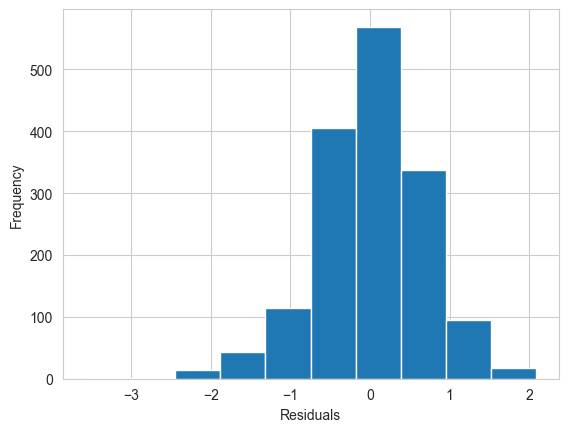

In [384]:
#Histogram
from matplotlib import pyplot as plt
plt.hist(results.resid)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [385]:
#Density plot

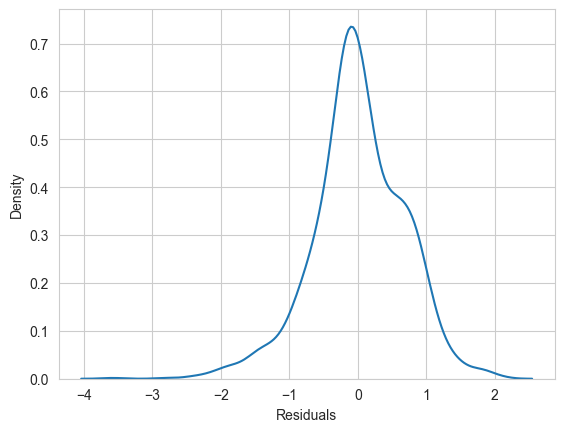

In [386]:
sns.kdeplot(results.resid)
sns.set_style("whitegrid")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

In [387]:
#Normal distribution plot

TypeError: 'str' object is not callable

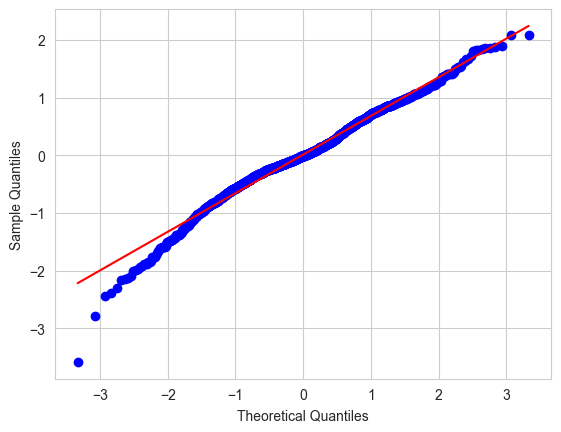

In [388]:
plt.figure()
stats.probplot(results.resid,plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("Q-Q Plot of Residuals-Red Wine")
plt.show()

winequality-white:

In [389]:
df_white = pa.read_csv(r"C:\Users\krent\OneDrive\Desktop\winequality-white.csv", delimiter=";")

In [390]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


1. Calculate all the coeficients

In [391]:
x = df_white[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y = df_white["quality"]

In [392]:
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
results.params

const                  152.978672
fixed acidity            0.066133
volatile acidity        -1.880175
citric acid              0.019149
residual sugar           0.082243
chlorides               -0.251227
free sulfur dioxide      0.003354
density               -153.110569
pH                       0.687880
sulphates                0.626206
alcohol                  0.192717
dtype: float64

In [393]:
#Updating the dataset as "density" value is quite high, therefore removing it as it may give a not so reliable outcome.
df_white_new=df_white.drop(["density"], axis=1)

In [394]:
x = df_white_new[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "pH", "sulphates", "alcohol"]]
y = df_white_new["quality"]

In [395]:
df_white_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,3.34,0.38,12.8,7


In [397]:
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
results.params

const                  2.063541
fixed acidity         -0.055274
volatile acidity      -2.017812
citric acid           -0.041297
residual sugar         0.024726
chlorides             -1.007017
free sulfur dioxide    0.003631
pH                     0.139008
sulphates              0.390032
alcohol                0.370365
dtype: float64

In [398]:
results.pvalues

const                   3.375950e-09
fixed acidity           1.832228e-04
volatile acidity        1.710490e-71
citric acid             6.672278e-01
residual sugar          1.768235e-22
chlorides               6.336229e-02
free sulfur dioxide     1.121269e-07
pH                      8.936382e-02
sulphates               5.422817e-05
alcohol                7.218400e-232
dtype: float64

In [399]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     202.9
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:38:01   Log-Likelihood:                -5577.4
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4888   BIC:                         1.124e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.0635      0.348      5.923      0.000       1.381       2.747
fixed acidity          -0.0553      0.015     -3.744      0.000      -0.084      -0.026
volatile acidity       -2.0178      0.111    -18.177      0.000      -2.235      -1.800
citric acid            -0.0413      0.096     -0.430      0.667      -0.230       0.147
residual sugar          0.0247      0.003      9.802      0.000       0.020       0.030
chlorides              -1.0070      0.542     -1.857      0.063      -2.070       0.056
free sulfur dioxide     0.0036      0.001      5.314      0.000       0.002       0.005
pH                      0.1390      0.082      1.699      0.089      -0.021       0.299
sulphates               0.3900      0.097      4.040      0.000       0.201       0.579
alcohol                 0.3704      0.011     34.353      0.000       0.349       0.392
==============================================================================
Omnibus:                      106.891   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.986
Skew:                           0.069   Prob(JB):                     1.89e-50
Kurtosis:                       4.050   Cond. No.                     2.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. Calculate p-values. 
   If any p-value is > 0.05, this means we are not sure if the coeficient is significant
     (close to zero - does not have an impact on the target variable).
     In this case - remove the factor from the Linear regression equation
     and recalculate the results again.
     Check p-values, repeat the procedure if needed.

In [400]:
check_pvalues = results.pvalues[results.pvalues <= 0.05].index.tolist()
if len(check_pvalues)<x.shape[1]:
    x=x[check_pvalues]

In [401]:
model = sm.OLS(y,x)
results = model.fit()
results.pvalues

const                   4.226811e-49
fixed acidity           2.741224e-07
volatile acidity        1.001466e-75
residual sugar          5.747486e-23
free sulfur dioxide     1.607803e-07
sulphates               1.481416e-05
alcohol                7.638983e-273
dtype: float64

In [402]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     302.8
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:40:31   Log-Likelihood:                -5581.1
No. Observations:                4898   AIC:                         1.118e+04
Df Residuals:                    4891   BIC:                         1.122e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.4462      0.164     14.894      0.000       2.124       2.768
fixed acidity          -0.0668      0.013     -5.148      0.000      -0.092      -0.041
volatile acidity       -2.0402      0.109    -18.740      0.000      -2.254      -1.827
residual sugar          0.0245      0.002      9.918      0.000       0.020       0.029
free sulfur dioxide     0.0036      0.001      5.247      0.000       0.002       0.005
sulphates               0.4123      0.095      4.336      0.000       0.226       0.599
alcohol                 0.3778      0.010     37.666      0.000       0.358       0.397
==============================================================================
Omnibus:                      106.468   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.207
Skew:                           0.078   Prob(JB):                     1.25e-49
Kurtosis:                       4.039   Cond. No.                         647.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. Calculate rest of desriptive measures of the model(MSE, R-squared, etc.)

In [403]:
results.mse_model

173.3767431360594

In [404]:
results.rsquared_adj

0.2699368495970069

In [405]:
results.rsquared

0.27083135212966325

Based on them, provide the feeback on how good the model fits the data.

Rerunning the model again after removing "density" variable from the dataset, rechecking pvalues,
calculating rest of desriptive measures of the model,
R-squared value was not impacted and remained at 0.27, which gives us a quite small accuarcy, there could be other factors that impacts the model.

Calculate the predictions for some predictior values selected (up to you to select), provide the feedback.

In [407]:
predi_values = pa.DataFrame({ 
"fixed acidity":[7.2],
"volatile acidity":[0.23],
"residual sugar":[8.5],
"free sulfur dioxide":[47], 
"sulphates":[0.40],
"alcohol":[9.9]})
predi = results.predict(predi_values)
predi

ValueError: shapes (1,6) and (7,) not aligned: 6 (dim 1) != 7 (dim 0)

 Do a small analysis on the residuals (histogram, density plot and compare it to normal distribution    plot)

In [408]:
results.resid

0       0.393459
1       0.706248
2       0.392458
3       0.222356
4       0.222356
          ...   
4893   -0.166217
4894   -0.568980
4895    0.599986
4896    0.421729
4897   -0.305299
Length: 4898, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

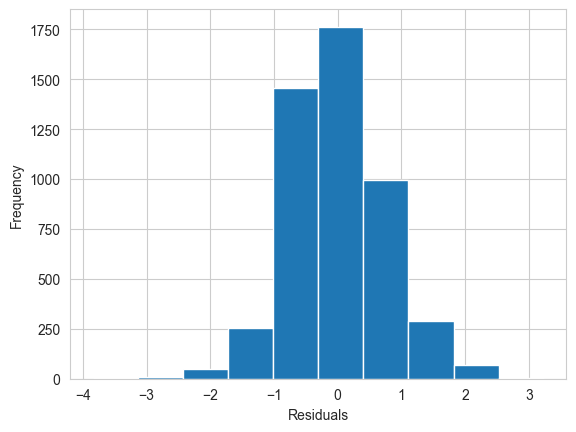

In [409]:
#Histogram
plt.hist(results.resid)
plt.title = "Histogram- Residuals"
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show

In [410]:
#Density plot

<function matplotlib.pyplot.show(close=None, block=None)>

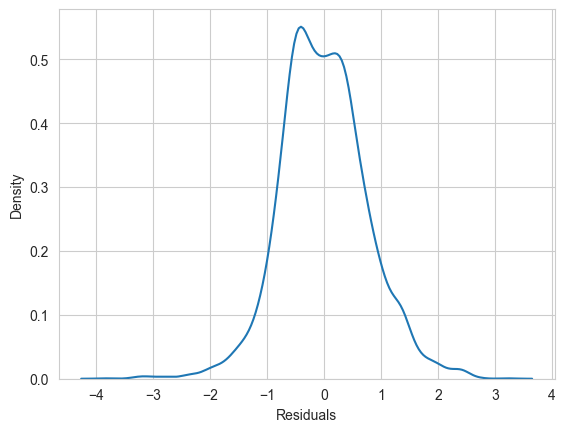

In [411]:
sns.kdeplot(results.resid)
sns.set_style("whitegrid")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show

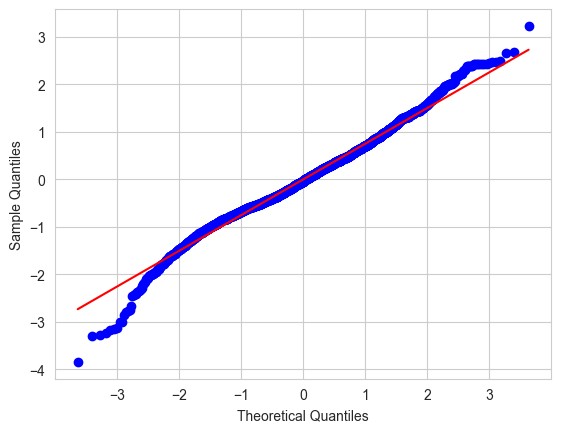

In [413]:
#Normal distribution plot
plt.figure()
stats.probplot(results.resid,plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

b) own dataset:

In [414]:
#Diabetes dataset
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pa.read_csv(url)

In [415]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [426]:
x = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]]
y = df["Pregnancies"]

In [427]:
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
results.params

const                      -0.432002
Glucose                    -0.005395
BloodPressure               0.004876
SkinThickness               0.000436
Insulin                    -0.001201
BMI                        -0.010193
DiabetesPedigreeFunction   -0.603210
Age                         0.148540
Outcome                     1.009485
dtype: float64

In [428]:
results.pvalues

const                       4.975062e-01
Glucose                     1.673212e-01
BloodPressure               3.934521e-01
SkinThickness               9.553167e-01
Insulin                     2.527577e-01
BMI                         4.968938e-01
DiabetesPedigreeFunction    5.736409e-02
Age                         1.433414e-48
Outcome                     6.561462e-05
dtype: float64

In [429]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Pregnancies   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     43.76
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           9.09e-58
Time:                        15:52:01   Log-Likelihood:                -1876.6
No. Observations:                 768   AIC:                             3771.
Df Residuals:                     759   BIC:                             3813.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.4320      0.636     -0.679      0.498      -1.681       0.817
Glucose                     -0.0054      0.004     -1.382      0.167      -0.013       0.002
BloodPressure                0.0049      0.006      0.854      0.393      -0.006       0.016
SkinThickness                0.0004      0.008      0.056      0.955      -0.015       0.016
Insulin                     -0.0012      0.001     -1.145      0.253      -0.003       0.001
BMI                         -0.0102      0.015     -0.680      0.497      -0.040       0.019
DiabetesPedigreeFunction    -0.6032      0.317     -1.903      0.057      -1.225       0.019
Age                          0.1485      0.009     15.750      0.000       0.130       0.167
Outcome                      1.0095      0.251      4.014      0.000       0.516       1.503
==============================================================================
Omnibus:                       32.295   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.367
Skew:                           0.379   Prob(JB):                     1.41e-10
Kurtosis:                       3.917   Cond. No.                     1.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. Calculate p-values. 
   If any p-value is > 0.05, this means we are not sure if the coeficient is significant
     (close to zero - does not have an impact on the target variable).
     In this case - remove the factor from the Linear regression equation
     and recalculate the results again.
     Check p-values, repeat the procedure if needed.

In [430]:
check_pvalues = results.pvalues[results.pvalues <= 0.05].index.tolist()
if len(check_pvalues)<x.shape[1]:
    x=x[check_pvalues]

In [431]:
model = sm.OLS(y,x)
results = model.fit()
results.pvalues

Age        4.827830e-134
Outcome     2.581803e-03
dtype: float64

In [432]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Pregnancies   R-squared (uncentered):                   0.691
Model:                            OLS   Adj. R-squared (uncentered):              0.690
Method:                 Least Squares   F-statistic:                              854.9
Date:                Mon, 17 Jul 2023   Prob (F-statistic):                   7.25e-196
Time:                        15:52:07   Log-Likelihood:                         -1892.2
No. Observations:                 768   AIC:                                      3788.
Df Residuals:                     766   BIC:                                      3798.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.1132      0.004     30.445      0.000       0.106       0.120
Outcome        0.6708      0.222      3.024      0.003       0.235       1.106
==============================================================================
Omnibus:                       55.734   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.306
Skew:                           0.649   Prob(JB):                     1.47e-15
Kurtosis:                       3.671   Cond. No.                         76.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. Calculate rest of desriptive measures of the model(MSE, R-squared, etc.)

In [433]:
results.mse_model

6927.918032565554

In [434]:
results.rsquared_adj

0.6898085715388622

In [435]:
results.rsquared

0.6906163617171464

 Based on them, provide the feeback on how good the model fits the data.

Rerunning the model again after recheking pvalues and
calculating rest of desriptive measures of the model,
R-squared value increased from 0.32 to 0.69,
therefore we can assume that the model was improved in accuarcy.

Calculate the predictions for some predictior values selected (up to you to select), provide the feedback.

In [436]:
predi_values = pa.DataFrame({ 
"Age":[7.8],
"Outcome":[0.8]})
predictions = results.predict(predi_values)
predictions

0    1.419359
dtype: float64

Do a small analysis on the residuals (histogram, density plot and compare it to normal distribution plot)

In [437]:
results.resid

0     -0.329275
1     -2.508257
2      3.707777
3     -1.376562
4     -4.405392
         ...   
763    2.870315
764   -1.055579
765    1.604912
766   -4.989767
767   -1.602901
Length: 768, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

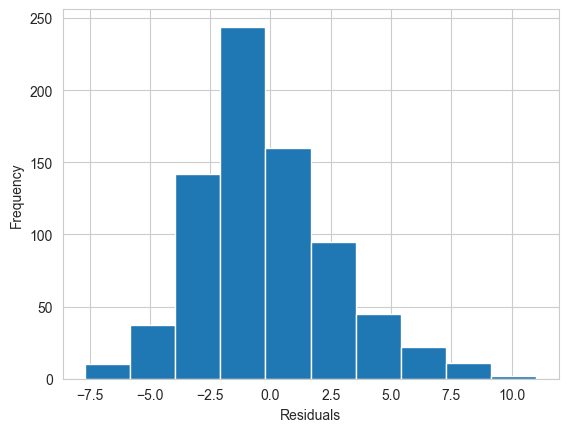

In [438]:
#Histogram
plt.hist(results.resid)
plt.title = "Histogram- Residuals"
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

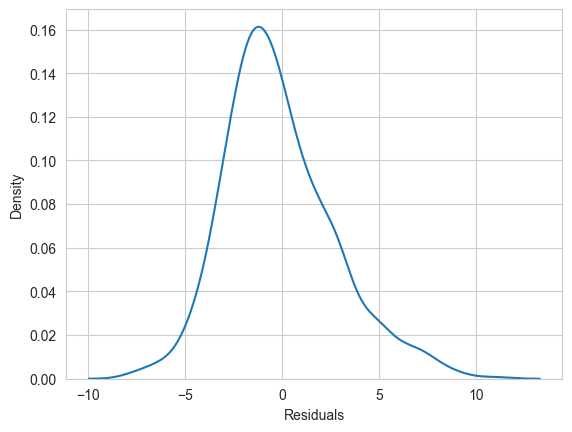

In [439]:
#Density plot
sns.kdeplot(results.resid)
sns.set_style("whitegrid")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show

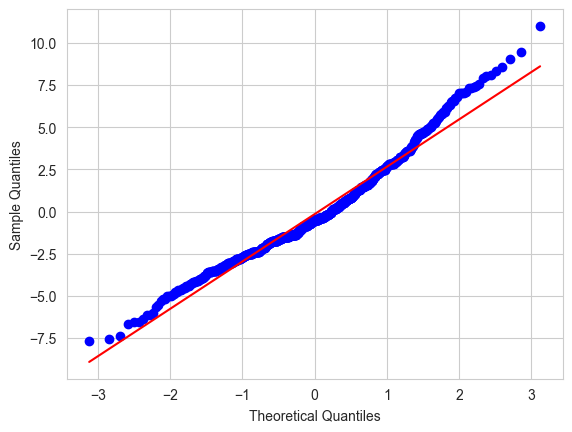

In [440]:
#Normal distribution plot
plt.figure()
stats.probplot(results.resid,plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

4. If in point b) you selected 1 factor regression,
   then display the model (regression line
   in plot)
